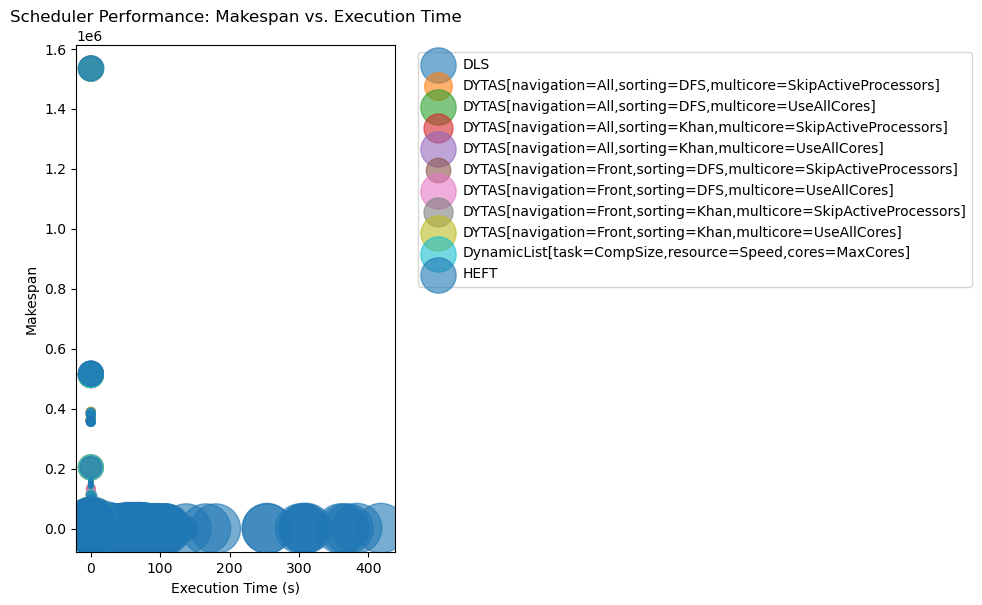

In [17]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file containing benchmark results
with open('benchmark-results.json', 'r') as f:
    data = json.load(f)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Extract 'max_used_cores' from the nested 'run_stats' dictionary.
# This assumes each record's run_stats contains a key "max_used_cores".
df['max_used_cores'] = df['run_stats'].apply(lambda x: x.get('max_used_cores', None))

# Optionally, you might want to inspect the DataFrame:
#print(df.head())

# Create a scatter plot:
#   - x-axis: execution time (exec_time)
#   - y-axis: makespan
#   - marker size: scaled by max_used_cores
#   - different colors/labels for each scheduler (algorithm)
plt.figure(figsize=(10, 6))
for scheduler, group in df.groupby('scheduler'):
    plt.scatter(group['exec_time'], group['makespan'], 
                s=group['max_used_cores']*10,  # scale marker size for visibility
                alpha=0.6, label=scheduler)
    
plt.xlabel('Execution Time (s)')
plt.ylabel('Makespan')
plt.title('Scheduler Performance: Makespan vs. Execution Time')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Save the plot if desired
plt.savefig('scheduler_performance.png', dpi=300)
plt.show()


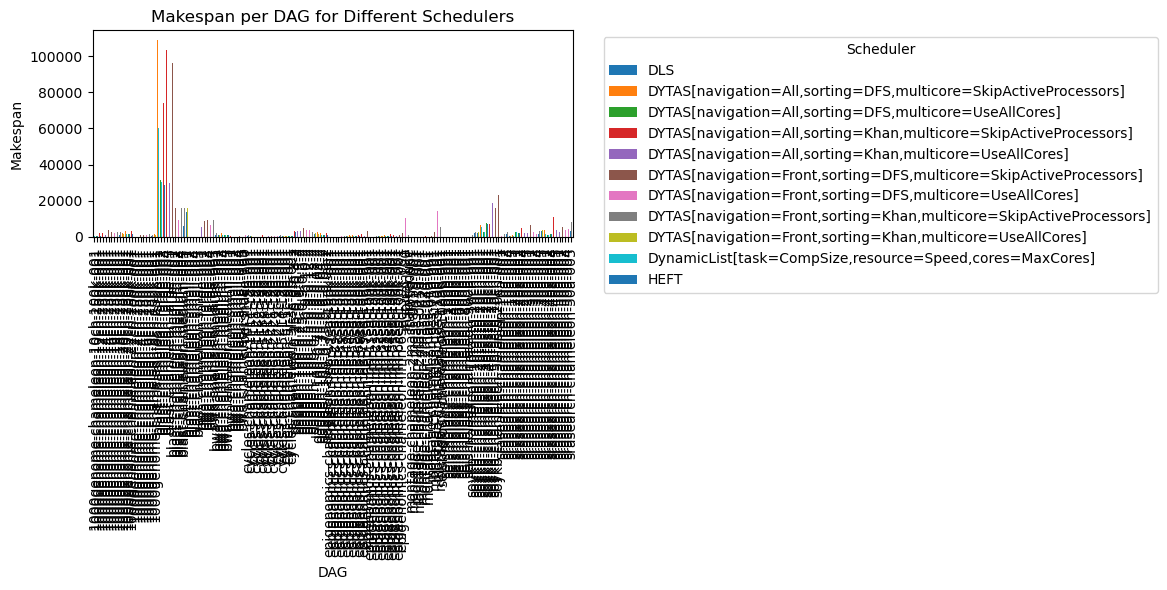

In [11]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file containing benchmark results
with open('benchmark-results.json', 'r') as f:
    data = json.load(f)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# If there are multiple entries for the same DAG and scheduler, average the makespan values.
# Otherwise, this step will simply return the same value.
grouped = df.groupby(['dag', 'scheduler'])['makespan'].mean().reset_index()

# Pivot the table so that the index is the DAG and columns are the scheduler, with makespan as the value.
pivot_df = grouped.pivot(index='dag', columns='scheduler', values='makespan')
pivot_df = pivot_df.sort_index()

# Plot a grouped bar chart:
ax = pivot_df.plot(kind='bar', figsize=(12, 6))
ax.set_xlabel("DAG")
ax.set_ylabel("Makespan")
ax.set_title("Makespan per DAG for Different Schedulers")
plt.legend(title="Scheduler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
# Save the plot as an image if desired
plt.savefig('makespan_by_dag.png', dpi=300)
plt.show()


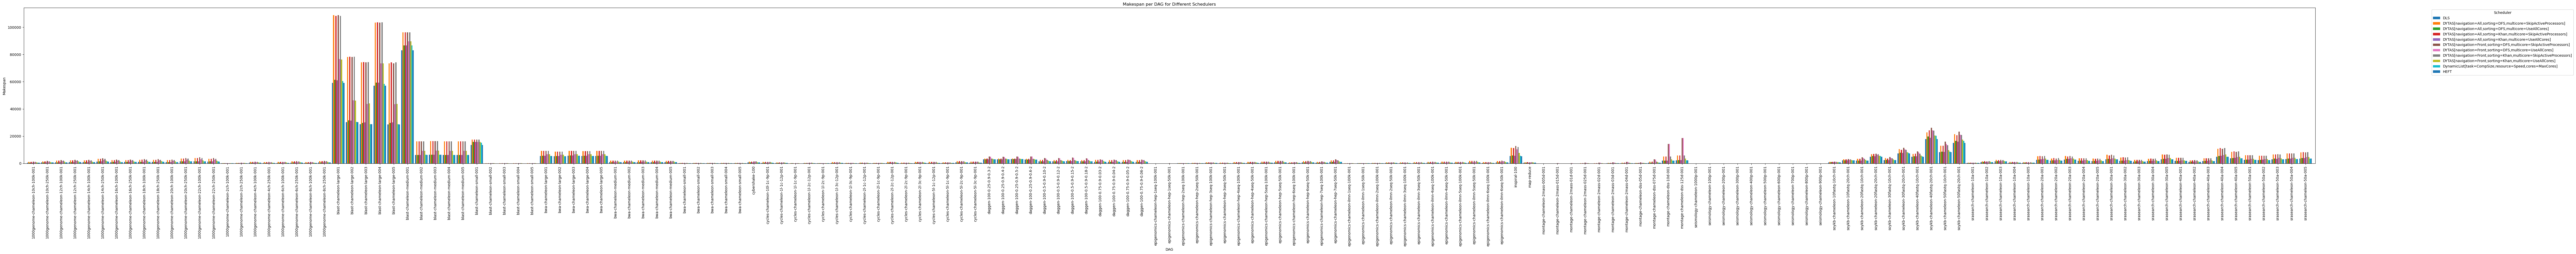

In [16]:
import json
import pandas as pd
import matplotlib.pyplot as plt

# Load the JSON file containing benchmark results
with open('benchmark-results.json', 'r') as f:
    data = json.load(f)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Group by DAG and scheduler, and average makespan if there are multiple entries
grouped = df.groupby(['dag', 'scheduler'])['makespan'].mean().reset_index()

# Pivot the data: each DAG is an index and each scheduler becomes a column
pivot_df = grouped.pivot(index='dag', columns='scheduler', values='makespan')
pivot_df = pivot_df.sort_index()

# Plot a grouped bar chart with thicker bars
ax = pivot_df.plot(kind='bar', figsize=(100, 10), width=0.9)
ax.set_xlabel("DAG")
ax.set_ylabel("Makespan")
ax.set_title("Makespan per DAG for Different Schedulers")
plt.legend(title="Scheduler", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('makespan_by_dag_thick.png', dpi=300)
plt.show()


/tmp/ipykernel_21191/2000929374.py:14: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', len(avg_makespan))


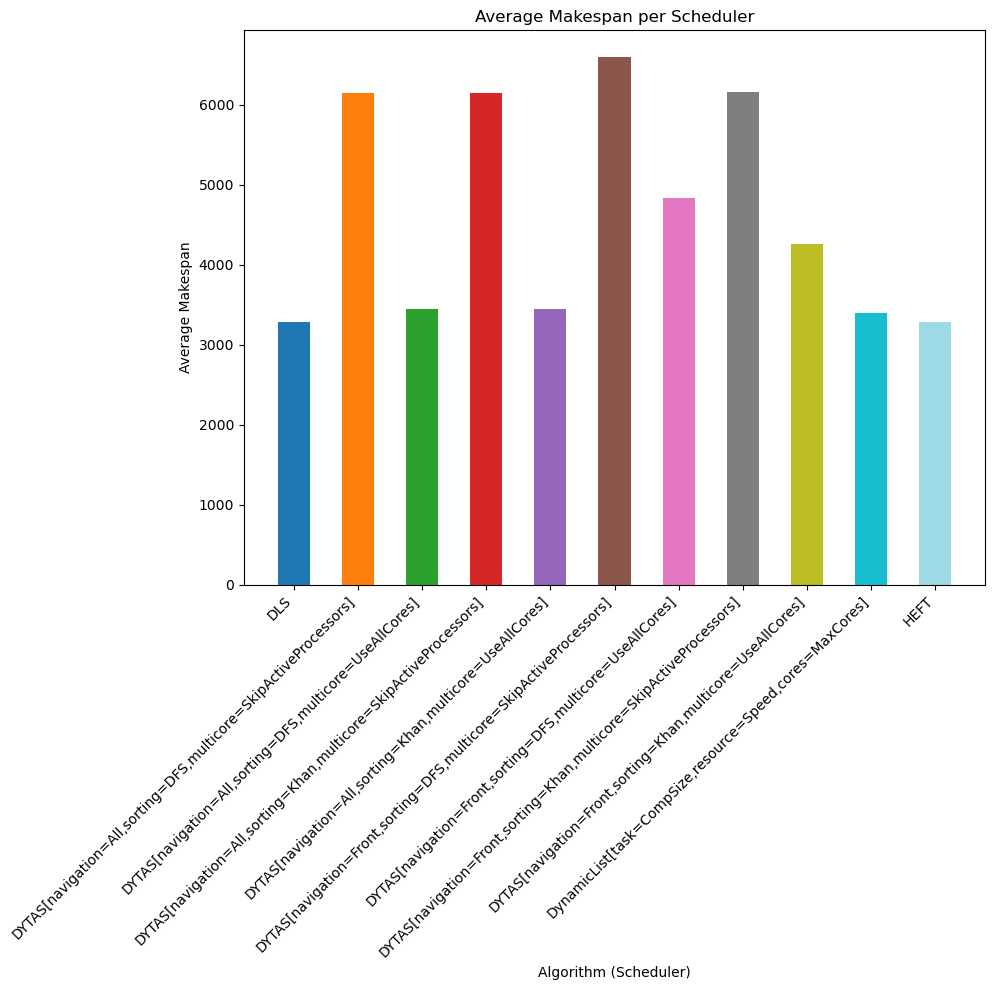

In [22]:
# Load the JSON file containing benchmark results
with open('benchmark-results.json', 'r') as f:
    data = json.load(f)

# Convert the list of dictionaries into a DataFrame
df = pd.DataFrame(data)

# Group the data by scheduler and calculate the average makespan for each scheduler
avg_makespan = df.groupby('scheduler')['makespan'].mean().reset_index()

# Create a bar chart with a unique color for each algorithm
plt.figure(figsize=(10, 10))
# Create a colormap with as many colors as there are schedulers
cmap = plt.cm.get_cmap('tab20', len(avg_makespan))

for i, row in avg_makespan.iterrows():
    plt.bar(row['scheduler'], row['makespan'], width=0.5, color=cmap(i))

plt.xlabel("Algorithm (Scheduler)")
plt.ylabel("Average Makespan")
plt.title("Average Makespan per Scheduler")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('avg_makespan_per_scheduler_colored.png', dpi=300)
plt.show()


In [9]:
import json

def calculate_dag_density(dag):
    """
    Calculate the density of a DAG.
    
    Density here is defined as:
        density = total number of edges / total number of nodes
        
    The DAG is assumed to have its tasks stored under:
        dag["workflow"]["tasks"]
        
    Each task is considered a node. The 'parents' field in each task lists its incoming edges.
    """
    # Retrieve tasks (nodes) from the DAG
    tasks = dag.get("workflow", {}).get("tasks", [])
    if not tasks:
        return 0, 0, 0  # If no tasks, then nodes, edges and density are all zero.

    num_nodes = len(tasks)

    # For graphs with fewer than 2 nodes, density is not defined (we return 0)
    if num_nodes < 2:
        return num_nodes, 0, 0.0
    
    # Sum up the edges from the length of the "parents" list for each task.
    num_edges = sum(len(task.get("parents", [])) for task in tasks)
    
    # Compute density using the DAG density equation
    # (Actual number of edges vs maximum number of possible edges)
    density = (2 * num_edges) / (num_nodes * (num_nodes - 1))
    return num_nodes, num_edges, density


In [10]:
dag_file = "/home/hgsm/dytas-comparisons/dags/wfinstances/pegasus/epigenomics/epigenomics-chameleon-ilmn-3seq-50k-001.json"

try:
    with open(dag_file, "r") as f:
        dag = json.load(f)
except Exception as e:
    print(f"Error loading file: {e}")
    sys.exit(1)

num_nodes, num_edges, density = calculate_dag_density(dag)

print("Number of nodes:", num_nodes)
print("Number of edges:", num_edges)
print("DAG Density (2*m/[n*(n-1)]):", density)

Number of nodes: 793
Number of edges: 985
DAG Density (2*m/[n*(n-1)]): 0.0031366629727285467


ANOVA across all schedulers:
F-value: 5.909318442574898 p-value: 5.4692759959658504e-09

ANOVA across DYTAS variants:
F-value: 5.175172814144563 p-value: 6.6274776802424784e-06


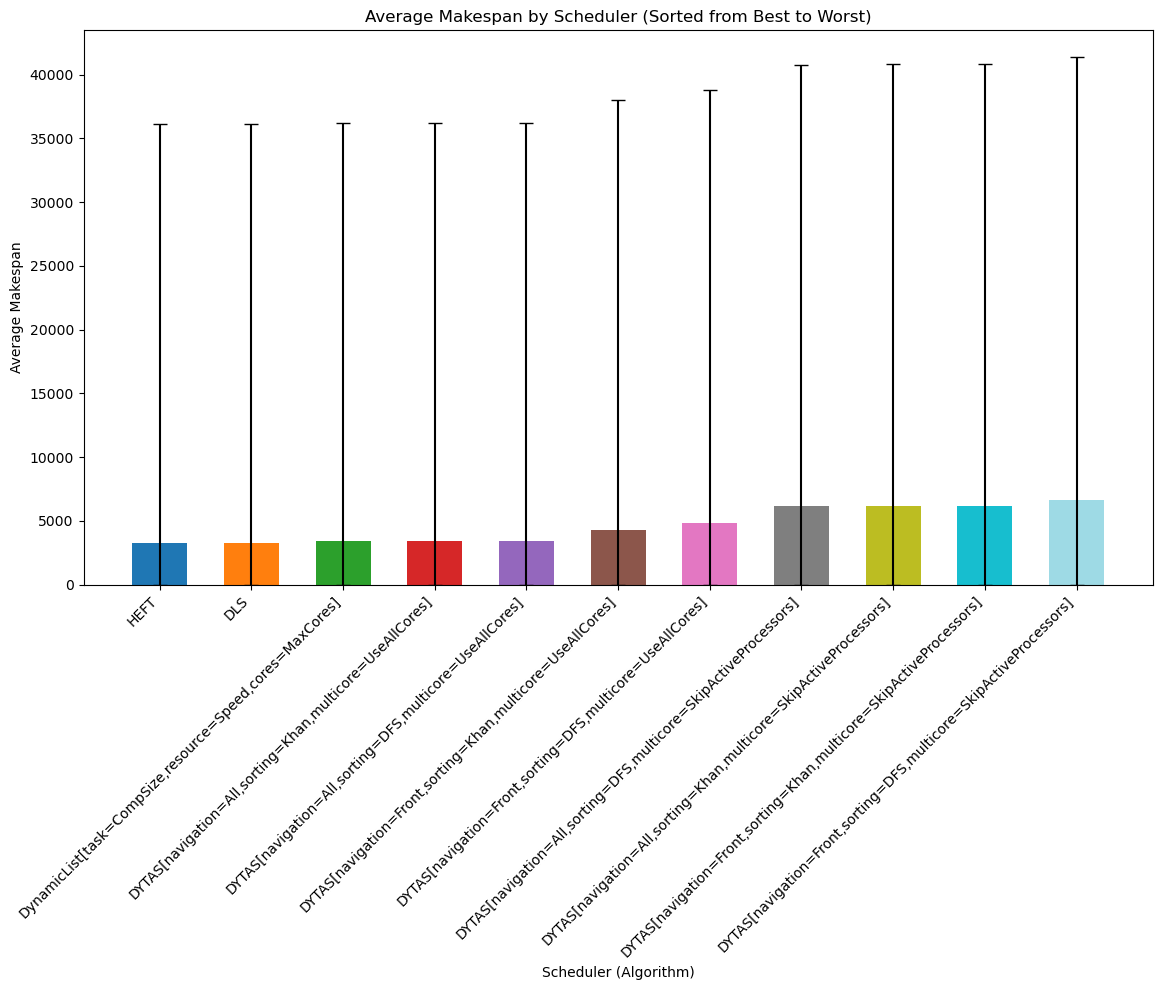

In [31]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import re
import numpy as np

# -------------------------------
# 1. Load Data
# -------------------------------
with open('benchmark-results.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

# -------------------------------
# 2. Parse DYTAS Parameters
# -------------------------------
def parse_dytas_params(scheduler):
    """
    Extracts parameter information from DYTAS scheduler names.
    E.g., "DYTAS[navigation=Front,sorting=DFS]" returns "navigation=Front,sorting=DFS".
    """
    if scheduler.startswith("DYTAS"):
        match = re.search(r"\[(.*?)\]", scheduler)
        if match:
            return match.group(1)
    return None

# Add a column with the parsed DYTAS parameters (None for non-DYTAS schedulers)
df['dytas_params'] = df['scheduler'].apply(parse_dytas_params)

# -------------------------------
# 3. Overall ANOVA Across All Schedulers
# -------------------------------
# Group makespan values by scheduler
groups = df.groupby('scheduler')['makespan'].apply(list)

# Perform one-way ANOVA test (null hypothesis: all groups have the same mean)
f_val, p_val = stats.f_oneway(*groups)
print("ANOVA across all schedulers:")
print("F-value:", f_val, "p-value:", p_val)

# -------------------------------
# 4. Analysis of DYTAS Variants
# -------------------------------
# Filter for rows where scheduler starts with "DYTAS"
dytas_df = df[df['scheduler'].str.startswith("DYTAS")]

# Group by the parsed DYTAS parameters
dytas_groups = dytas_df.groupby('dytas_params')['makespan'].apply(list)
if len(dytas_groups) > 1:
    f_val_dytas, p_val_dytas = stats.f_oneway(*dytas_groups)
    print("\nANOVA across DYTAS variants:")
    print("F-value:", f_val_dytas, "p-value:", p_val_dytas)
else:
    print("\nNot enough DYTAS variant groups for an ANOVA test.")

# You could further perform post-hoc tests (e.g., Tukey's HSD) if needed.

# -------------------------------
# 5. Visualization with Boxplots
# -------------------------------
# Group by scheduler and calculate average makespan and standard deviation
agg = df.groupby('scheduler')['makespan'].agg(['mean', 'std']).reset_index()

# Sort the aggregated DataFrame from lowest to highest average makespan
agg_sorted = agg.sort_values('mean')

# Compute asymmetric error bars:
# Lower error: if (mean - std) < 0, use mean, else use std.
agg_sorted['lower_err'] = agg_sorted.apply(lambda row: row['std'] if (row['mean'] - row['std']) >= 0 else row['mean'], axis=1)
agg_sorted['upper_err'] = agg_sorted['std']

# Prepare the error array for matplotlib (2-row array: lower and upper errors)
asym_err = [agg_sorted['lower_err'].values, agg_sorted['upper_err'].values]

# Create a bar chart
plt.figure(figsize=(12, 10))
colors = plt.cm.tab20(np.linspace(0, 1, len(agg_sorted)))
plt.bar(agg_sorted['scheduler'], agg_sorted['mean'], yerr=asym_err, capsize=5, width=0.6, color=colors)
plt.xlabel("Scheduler (Algorithm)")
plt.ylabel("Average Makespan")
plt.title("Average Makespan by Scheduler (Sorted from Best to Worst)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig('avg_makespan_asymmetric_errorbars_sorted.png', dpi=300)
plt.show()


In [34]:
#!/usr/bin/env python3
import json
import sys
import os
from collections import deque

def load_workflow(json_filename):
    with open(json_filename, 'r') as f:
        data = json.load(f)
    workflow = data.get("workflow", {})
    tasks = workflow.get("tasks", [])
    machines = workflow.get("machines", [])
    return tasks, machines

def build_machine_map(machines):
    # Map machine name (nodeName) to its cpu speed
    machine_map = {}
    for m in machines:
        name = m.get("nodeName")
        if name and "cpu" in m and "speed" in m["cpu"]:
            machine_map[name] = m["cpu"]["speed"]
    return machine_map

def compute_task_flops(task, machine_map):
    # For each task, compute FLOPS = runtimeInSeconds * machine_cpu_speed / 1000
    runtime = task.get("runtimeInSeconds", 0)
    machine_name = task.get("machine")
    speed = machine_map.get(machine_name, 1)  # default speed if not found is 1
    return runtime * speed / 1000.0

def build_task_map(tasks):
    # Build a mapping from task name to task data and compute flops for each task.
    task_map = {}
    for task in tasks:
        name = task.get("name")
        if name:
            task_map[name] = task.copy()
    return task_map

def build_graph(tasks):
    # Build a graph representation: for each task, store its parents and also track its children.
    # We'll also compute the in-degree of each node for topological sorting.
    graph = {}
    in_degree = {}
    for task in tasks:
        name = task.get("name")
        graph[name] = {
            "parents": task.get("parents", []),
            "children": []
        }
        in_degree[name] = len(task.get("parents", []))
    # Now, for each task, add it as a child to each of its parent tasks.
    for task in tasks:
        name = task.get("name")
        for parent in task.get("parents", []):
            if parent in graph:
                graph[parent]["children"].append(name)
    return graph, in_degree

def compute_critical_path(tasks, machine_map):
    """
    Computes the critical path based on FLOPS.
    Returns a tuple (max_flops, critical_path_list)
    where max_flops is the sum of FLOPS along the critical path,
    and critical_path_list is the list of task names in order.
    """
    task_map = build_task_map(tasks)
    graph, in_degree = build_graph(tasks)
    
    # For each task, compute its own flops value.
    flops = {}
    for task in tasks:
        name = task.get("name")
        flops[name] = compute_task_flops(task, machine_map)
    
    # dp[node] will store the maximum accumulated FLOPS from a source to this node.
    dp = {}
    # parent pointer to reconstruct path.
    prev = {}
    
    # Topological sort using a queue (Kahn's algorithm)
    queue = deque()
    for name, deg in in_degree.items():
        if deg == 0:
            dp[name] = flops[name]
            queue.append(name)
            prev[name] = None

    while queue:
        node = queue.popleft()
        for child in graph[node]["children"]:
            # If going through node improves child's accumulated flops, update it.
            candidate = dp[node] + flops[child]
            if child not in dp or candidate > dp[child]:
                dp[child] = candidate
                prev[child] = node
            # Decrement in-degree and enqueue if 0.
            in_degree[child] -= 1
            if in_degree[child] == 0:
                queue.append(child)
    
    # Identify sink node with maximum dp value
    max_node = None
    max_val = 0
    for node, total in dp.items():
        # A sink node is one with no children.
        if not graph[node]["children"]:
            if total > max_val:
                max_val = total
                max_node = node

    # Reconstruct the path from the sink node backward
    critical_path = []
    current = max_node
    while current is not None:
        critical_path.append(current)
        current = prev.get(current)
    critical_path.reverse()  # so that path is from source to sink
    
    return max_val, critical_path


In [73]:
# json_filename = "/home/hgsm/dytas-comparisons/dags/wfinstances/pegasus/epigenomics/epigenomics-chameleon-ilmn-3seq-50k-001.json"
# if not os.path.exists(json_filename):
#     print("Error: File {} does not exist".format(json_filename))
#     sys.exit(1)

# tasks, machines = load_workflow(json_filename)
# if not tasks:
#     print("No tasks found in the workflow.")
#     sys.exit(1)

# machine_map = build_machine_map(machines)
# total_flops, cp = compute_critical_path(tasks, machine_map)

# print("Critical Path (by task names):")
# for t in cp:
#     print("  - {} (FLOPS: {:.2f})".format(t, compute_task_flops(build_task_map(tasks)[t], machine_map)))
# print("Total FLOPS along Critical Path: {:.2f}".format(total_flops))


In [74]:
# system_yaml = "/home/hgsm/dytas-comparisons/systems/cluster-het-4-32.yaml"

In [110]:
def compute_critical_path_min_time(cp, tasks, system_file):
    with open(system_file) as f:
        system = yaml.safe_load(f)

    min_execution_times = {}
    
    for task in cp:
        min_execution_time = float('inf')
        task_flops = compute_task_flops(build_task_map(tasks)[task], machine_map)
        for node in system.get("resources"):
            exec_time = task_flops * node.get("speed")
            if exec_time < min_execution_time:
                min_execution_time = exec_time
                
        min_execution_times[task] = min_execution_time

    return sum(min_execution_times.values())

In [111]:
def compute_schedule_length_ratio(makespan, dag_file, system_file):
    if not os.path.exists(dag_file):
        print("Error: File {} does not exist".format(dag_file))
        sys.exit(1)
    
    tasks, machines = load_workflow(dag_file)
    if not tasks:
        print("No tasks found in the workflow.")
        sys.exit(1)

    machine_map = build_machine_map(machines)
    total_flops, cp = compute_critical_path(tasks, machine_map)

    cp_min_time = compute_critical_path_min_time(cp, tasks, system_file)

    if cp_min_time == 0:
        return float('inf')
    
    return makespan / cp_min_time
    

In [108]:
import yaml

compute_schedule_length_ratio(100, json_filename, system_yaml)

0.1388984497321788

In [114]:
#!/usr/bin/env python3
import os
import argparse

def find_file(target_filename, search_path="."):
    """
    Recursively search for files with the name target_filename starting from search_path.
    
    Parameters:
      search_path (str): The directory to start the search (absolute or relative).
      target_filename (str): The exact name of the file to search for.
      
    Returns:
      list of str: Full file paths that match the target_filename.
    """

    for root, dirs, files in os.walk(search_path):
        for file in files:
            if file == target_filename:
                return os.path.join(root, file)
    return ""

In [115]:
with open('benchmark-results.json', 'r') as f:
    data = json.load(f)
df = pd.DataFrame(data)

In [116]:
df["dag_path"] = df["dag"].apply(lambda fn: find_file(fn + ".json", search_path=os.getcwd()))

In [117]:
df["system_path"] = df["system"].apply(lambda fn: find_file(fn + ".yaml", search_path=os.getcwd()))

In [118]:
df[df["dag_path"] == ""]

,dag,system,scheduler,completed,makespan,exec_time,run_stats,dag_path,system_path
12243,cybershake-100,cluster-het-4-32,DLS,True,396.684060,0.016917,"{'expected_makespan': 396.6838603085334, 'sche...",,/home/hgsm/dytas-comparisons/systems/cluster-h...
12244,cybershake-100,cluster-het-4-32,"DYTAS[navigation=All,sorting=DFS,multicore=Ski...",True,1403.489693,0.001381,"{'scheduling_time': 0.00012344400000000006, 't...",,/home/hgsm/dytas-comparisons/systems/cluster-h...
12245,cybershake-100,cluster-het-4-32,"DYTAS[navigation=All,sorting=DFS,multicore=Use...",True,453.983838,0.001362,"{'scheduling_time': 0.00013234999999999996, 't...",,/home/hgsm/dytas-comparisons/systems/cluster-h...
12246,cybershake-100,cluster-het-4-32,"DYTAS[navigation=All,sorting=Khan,multicore=Sk...",True,1439.171314,0.001374,"{'scheduling_time': 0.00012961200000000003, 't...",,/home/hgsm/dytas-comparisons/systems/cluster-h...
12247,cybershake-100,cluster-het-4-32,"DYTAS[navigation=All,sorting=Khan,multicore=Us...",True,515.080801,0.001391,"{'scheduling_time': 0.000149879, 'total_task_t...",,/home/hgsm/dytas-comparisons/systems/cluster-h...
...,...,...,...,...,...,...,...,...,...
25828,map-reduce,single-32cores,"DYTAS[navigation=Front,sorting=DFS,multicore=U...",True,1206.028900,0.000293,"{'scheduling_time': 1.1028999999999997e-05, 't...",,/home/hgsm/dytas-comparisons/systems/single-32...
25829,map-reduce,single-32cores,"DYTAS[navigation=Front,sorting=Khan,multicore=...",True,1206.028900,0.000274,"{'scheduling_time': 1.4185999999999998e-05, 't...",,/home/hgsm/dytas-comparisons/systems/single-32...
25830,map-reduce,single-32cores,"DYTAS[navigation=Front,sorting=Khan,multicore=...",True,1206.028900,0.000230,"{'scheduling_time': 1.3677999999999998e-05, 't...",,/home/hgsm/dytas-comparisons/systems/single-32...
25831,map-reduce,single-32cores,"DynamicList[task=CompSize,resource=Speed,cores...",True,260.160200,0.000317,"{'scheduling_time': 5.233800000000001e-05, 'to...",,/home/hgsm/dytas-comparisons/systems/single-32...


In [112]:
df["SLR"] = df.apply(lambda row: compute_schedule_length_ratio(row["makespan"], row["dag_path"], row["system_path"]), axis=1)

IndexError: list index out of range